In [1]:
import numpy as np
from scipy import constants as scp
from matplotlib import pyplot as plt
import matplotlib
from scipy.odr import *
from scipy.stats import chisquare
from scipy.optimize import curve_fit

In [2]:
def G(B, t):
    k1 = B[0]
    k2 = B[1]
    c = B[2]
    return c * np.exp(k1 * t + k2/2 * t)
g = Model(G)

In [3]:
wl = 532e-9
Temp = 298.16000

In [4]:
def Degree_to_Radian(x):
    return 2 * np.pi /360 * x



def q(n, angle):
    return 4 * np.pi * n / wl * np.sin(angle/2)



def a_h(k1, dk1, q, eta):
    A = scp.Boltzmann * Temp * q**2 / (6 * np.pi * eta * k1)
    dA = dk1 * scp.Boltzmann * Temp * q**2 / (6 * np.pi * eta * k1**2)
    return [A, dA]



def P(a, q):
    return (9 / ((q * a)**6) * (np.sin(q * a) - q * a * np.cos(q * a))**2)
p = Model(P)

In [5]:
na = 1.33000
visa = 0.89454

5455318.39268
Beta: [  1.60291259e+04  -3.20587557e+04   5.66670925e-01]
Beta Std Error: [  1.04401453e+02   2.08816789e+02   1.93687105e-03]
Beta Covariance: [[  4.57689238e+07  -9.15439336e+07   2.52568870e+02]
 [ -9.15439336e+07   1.83100040e+08  -5.05196961e+02]
 [  2.52568870e+02  -5.05196961e+02   1.57528461e-02]]
Residual Variance: 0.00023814550319834082
Inverse Condition #: 2.0999574856367982e-05
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.310766652385
a_h1= 4.53276835091e-10 da_h1= 2.9516794607e-12


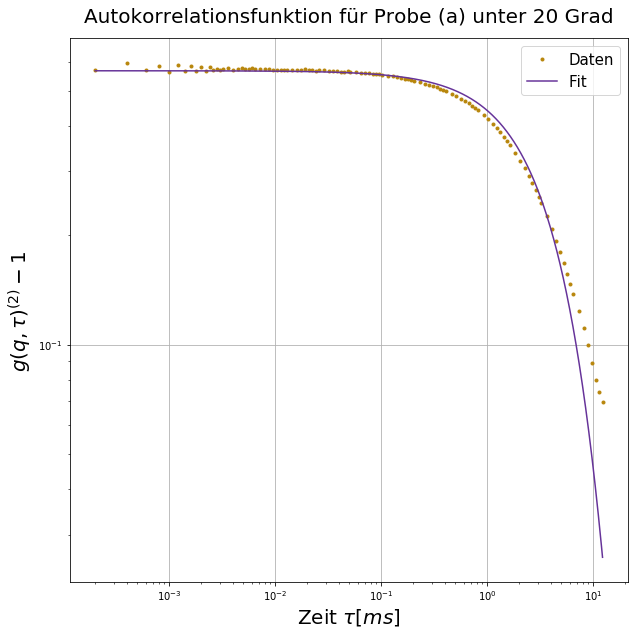

In [6]:
datei = 'proba20corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte2 = 188.28963 * np.sin(Degree_to_Radian(20)) * 1000
t = np.linspace(min(T), max(T), 10000)



q2 = q(na, Degree_to_Radian(20))
print(q2)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.2e4, -2.4e4, 0.56])
fit = odr.run()
fit.pprint()



A1 = [1.60290692e+04, -3.20586422e+04, 5.66671016e-01]
a, _ = chisquare(f_obs = corr, f_exp = G(A1, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', a)



a_h1, da_h1 = a_h(1.60290692e1, 1.04379202e-1, q2, visa)
print('a_h1=', a_h1, 'da_h1=', da_h1)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A1, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 20 Grad', fontsize = 20, y = 1.02)
fig

8131040.10703
Beta: [  1.86180563e+04  -3.72373433e+04   5.92095933e-01]
Beta Std Error: [  3.19162632e+02   6.38346756e+02   1.49828487e-03]
Beta Covariance: [[  9.22003846e+08  -1.84406978e+09   1.32710825e+03]
 [ -1.84406978e+09   3.68826374e+09  -2.65437942e+03]
 [  1.32710825e+03  -2.65437942e+03   2.03187714e-02]]
Residual Variance: 0.00011048195282174886
Inverse Condition #: 9.68199544015493e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.179310846534
a_h2= 8.6730379052e-10 da_h2= 1.48921680911e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


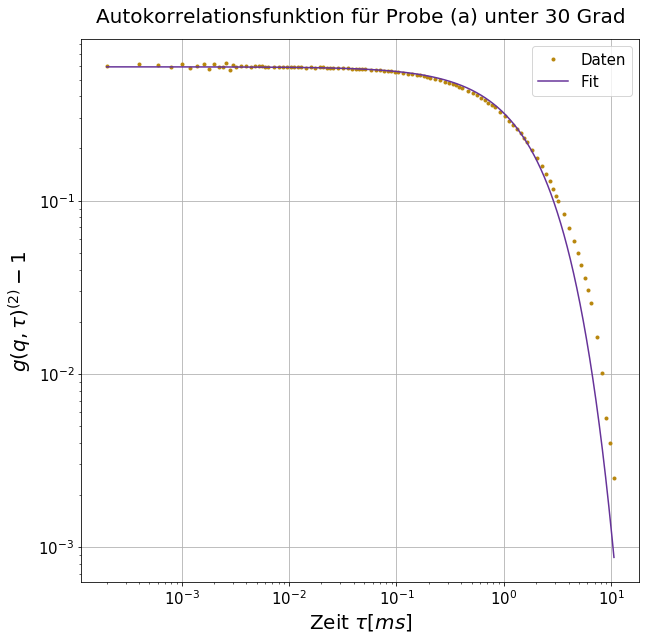

In [7]:
datei = 'proba30corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte3 = 104.40894 * np.sin(Degree_to_Radian(30)) * 1000
t = np.linspace(min(T), max(T), 10000)



q3 = q(na, Degree_to_Radian(30))
print(q3)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.4e4, -3.3e4, 0.6])
fit = odr.run()
fit.pprint()



A2 = [1.86102662e+04, -3.72217631e+04, 5.92095779e-01]
b, _ = chisquare(f_obs = corr, f_exp = G(A2, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', b)



a_h2, da_h2 = a_h(1.86102662e1, 3.19550330e-1, q3, visa)
print('a_h2=', a_h2, 'da_h2=', da_h2)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A2, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 30 Grad', fontsize = 20, y = 1.02)
fig

10744879.6965
Beta: [  1.73904270e+04  -3.47831587e+04   5.65729434e-01]
Beta Std Error: [  1.09685502e+03   2.19374841e+03   1.51781166e-03]
Beta Covariance: [[  1.51153821e+10  -3.02312930e+10   6.91957501e+03]
 [ -3.02312930e+10   6.04636436e+10  -1.38395837e+04]
 [  6.91957501e+03  -1.38395837e+04   2.89438599e-02]]
Residual Variance: 7.959381524714802e-05
Inverse Condition #: 5.080361472543777e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.12681567994
a_h3= 1.62081568204e-09 da_h3= 1.02134123179e-10


C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


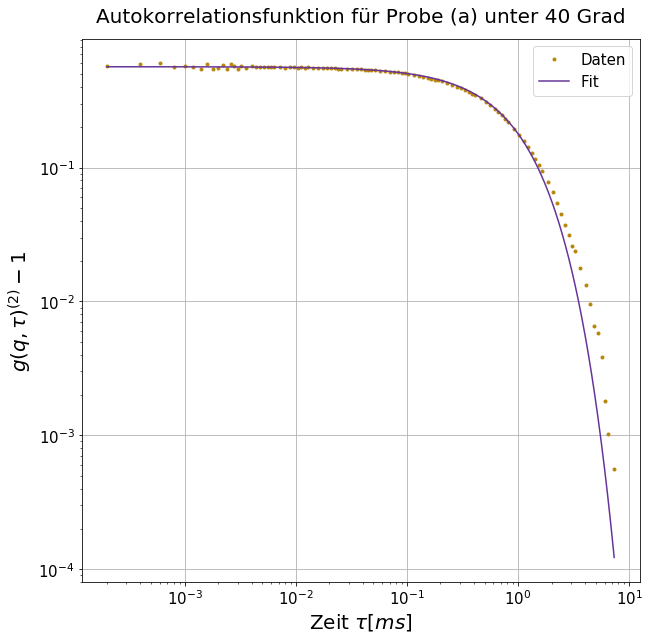

In [8]:
datei = 'proba40corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte4 = 71.72742 * np.sin(Degree_to_Radian(40)) * 1000
t = np.linspace(min(T), max(T), 10000)



q4 = q(na, Degree_to_Radian(40))
print(q4)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.6e4, -3.3e4, 0.6])
fit = odr.run()
fit.pprint()



A3 = [1.73900611e+04, -3.47824270e+04, 5.65729427e-01]
c, _ = chisquare(f_obs = corr, f_exp = G(A3, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', c)



a_h3, da_h3 = a_h(1.73900611e1, 1.09581778, q4, visa)
print('a_h3=', a_h3, 'da_h3=', da_h3)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A3, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 40 Grad', fontsize = 20, y = 1.02)
fig

13276944.2636
Beta: [  4.63435525e+04  -9.26906467e+04   5.64807570e-01]
Beta Std Error: [  9.11091000e+02   1.82223995e+03   1.67338440e-03]
Beta Covariance: [[  1.29160239e+10  -2.58328693e+10   8.11327112e+03]
 [ -2.58328693e+10   5.16673819e+10  -1.62274608e+04]
 [  8.11327112e+03  -1.62274608e+04   4.35709228e-02]]
Residual Variance: 6.426798355066379e-05
Inverse Condition #: 9.140131103569336e-06
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 1.64016340133
a_h4= 6.11829933494e-10 da_h4= 1.217894797e-11


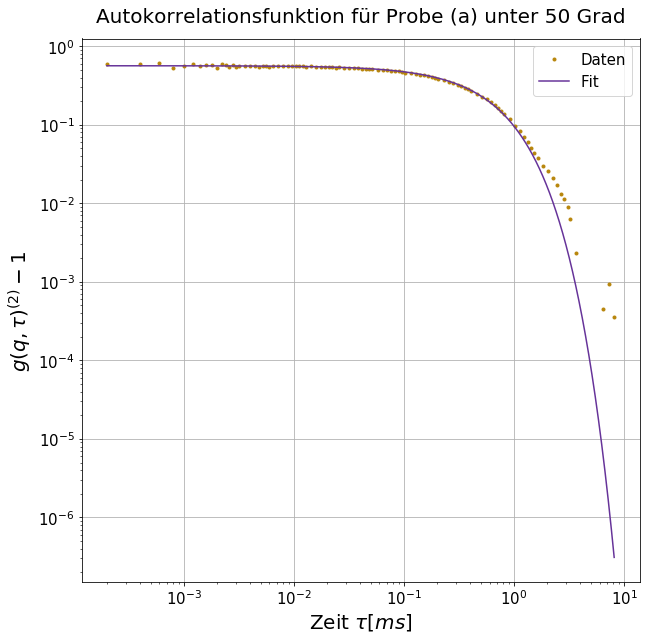

In [9]:
datei = 'proba50corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte5 = 48.24179 * np.sin(Degree_to_Radian(50)) * 1000
t = np.linspace(min(T), max(T), 10000)



q5 = q(na, Degree_to_Radian(50))
print(q5)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [3e4, -6e4, 0.6])
fit = odr.run()
fit.pprint()



A4 = [4.60684942e+04, -9.21405301e+04, 5.64806263e-01]
d, _ = chisquare(f_obs = corr, f_exp = G(A4, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', d)



a_h4, da_h4 = a_h(4.60684942e1, 9.17029003e-1, q4, visa)
print('a_h4=', a_h4, 'da_h4=', da_h4)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A4, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 50 Grad', fontsize = 20, y = 1.02)
fig

15707963.2679
Beta: [  7.46372599e+04  -1.49279342e+05   5.28577271e-01]
Beta Std Error: [  1.23355954e+03   2.46721633e+03   2.09443636e-03]
Beta Covariance: [[  2.11172441e+10  -4.22361530e+10   1.28697806e+04]
 [ -4.22361530e+10   8.44756358e+10  -2.57413339e+04]
 [  1.28697806e+04  -2.57413339e+04   6.08767341e-02]]
Residual Variance: 7.20581310111656e-05
Inverse Condition #: 1.097207482209913e-05
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 0.145571858045
a_h5= 8.06925598803e-10 da_h5= 1.33401791963e-11


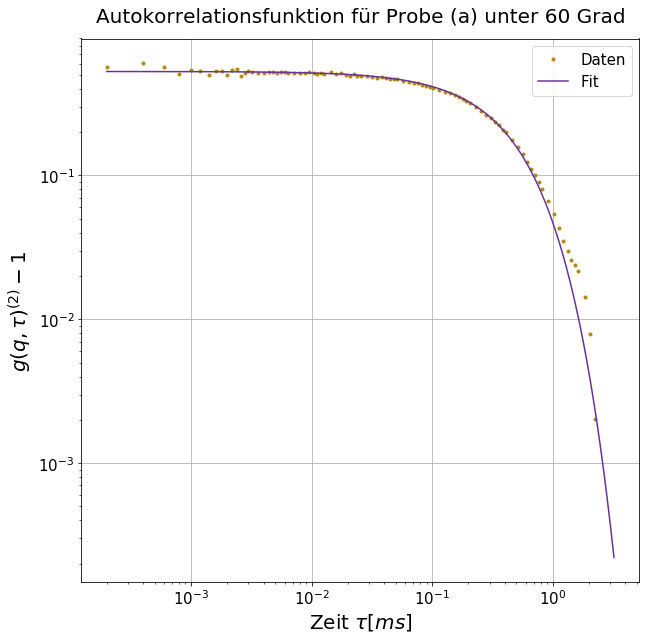

In [10]:
datei = 'proba60corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte6 = 31.90657 * np.sin(Degree_to_Radian(60)) * 1000
t = np.linspace(min(T), max(T), 10000)



q6 = q(na, Degree_to_Radian(60))
print(q6)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()

A5 = [7.46513875e+04, -1.49307598e+05, 5.28582068e-01]
e, _ = chisquare(f_obs = corr, f_exp = G(A5, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', e)



a_h5, da_h5 = a_h(7.46513875e1, 1.23414462, q6, visa)
print('a_h5=', a_h5, 'da_h5=', da_h5)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A5, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 60 Grad', fontsize = 20, y = 1.02)
fig

18019435.1871
Beta: [  1.03771764e+05  -2.07550251e+05   5.31932757e-01]
Beta Std Error: [  2.16325269e+03   4.32668758e+03   3.23522097e-03]
Beta Covariance: [[  4.61490180e+10  -9.23019230e+10   2.57296544e+04]
 [ -9.23019230e+10   1.84611620e+11  -5.14630541e+04]
 [  2.57296544e+04  -5.14630541e+04   1.03218100e-01]]
Residual Variance: 0.00010140328860738001
Inverse Condition #: 1.1107960149860611e-05
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 0.227534573898
a_h6= 1.06188157969e-09 da_h6= 1.75551383912e-11


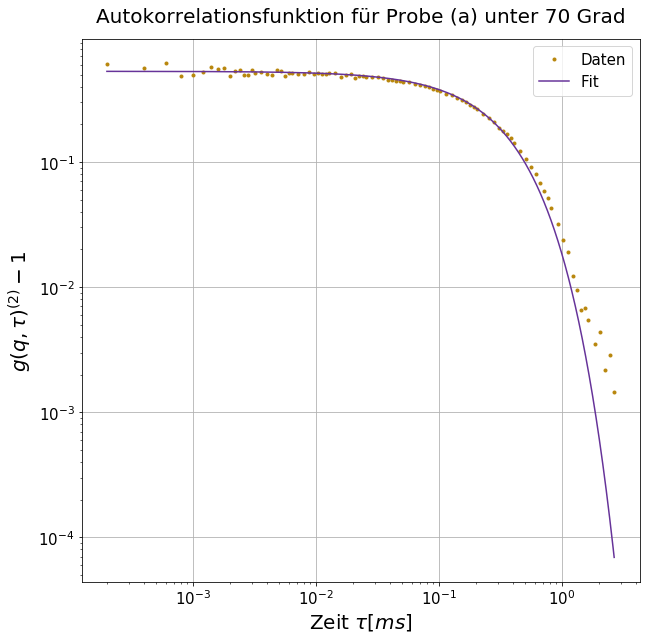

In [11]:
datei = 'proba70corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte7 = 23.62987 * np.sin(Degree_to_Radian(70)) * 1000
t = np.linspace(min(T), max(T), 10000)



q7 = q(na, Degree_to_Radian(70))
print(q7)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A6 = [1.03221510e+05, -2.06449744e+05, 5.31943606e-01]
f, _ = chisquare(f_obs = corr, f_exp = G(A6, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', f)



a_h6, da_h6 = a_h(7.46513875e1, 1.23414462, q7, visa)
print('a_h6=', a_h6, 'da_h6=', da_h6)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A6, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 70 Grad', fontsize = 20, y = 1.02)
fig

20193768.3241
Beta: [  1.24651347e+05  -2.49311559e+05   5.29934826e-01]
Beta Std Error: [  4.11557094e+03   8.23147930e+03   5.11609338e-03]
Beta Covariance: [[  1.09757375e+11  -2.19523748e+11   5.28984192e+04]
 [ -2.19523748e+11   4.39065494e+11  -1.05804282e+05]
 [  5.28984192e+04  -1.05804282e+05   1.69609609e-01]]
Residual Variance: 0.0001543215132064812
Inverse Condition #: 1.0369628566269089e-05
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 0.183398913839
a_h7= 7.98648358615e-10 da_h7= 2.63750247123e-11


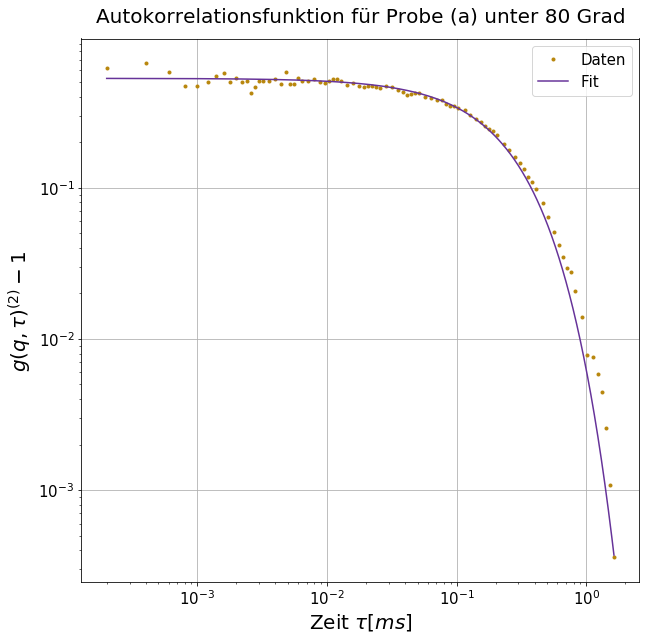

In [12]:
datei = 'proba80corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte8 = 16.23212 * np.sin(Degree_to_Radian(80)) * 1000
t = np.linspace(min(T), max(T), 10000)



q8 = q(na, Degree_to_Radian(80))
print(q8)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A7 = [1.24655303e+05, -2.49319472e+05, 5.29925171e-01]
h, _ = chisquare(f_obs = corr, f_exp = G(A7, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', h)



a_h7, da_h7 = a_h(1.24655303e+02, 4.11668873, q8, visa)
print('a_h7=', a_h7, 'da_h7=', da_h7)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A7, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 80 Grad', fontsize = 20, y = 1.02)
fig

22214414.6908
Beta: [  1.58480953e+05  -3.16972959e+05   5.24500491e-01]
Beta Std Error: [  5.72996767e+03   1.14604446e+04   6.64805989e-03]
Beta Covariance: [[  1.93157452e+11  -3.86332070e+11   9.20273610e+04]
 [ -3.86332070e+11   7.72698475e+11  -1.84068397e+05]
 [  9.20273610e+04  -1.84068397e+05   2.60014142e-01]]
Residual Variance: 0.00016997806332098994
Inverse Condition #: 1.0667981506081618e-05
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 0.232844407817
a_h8= 7.61240730791e-10 da_h8= 2.75521225515e-11


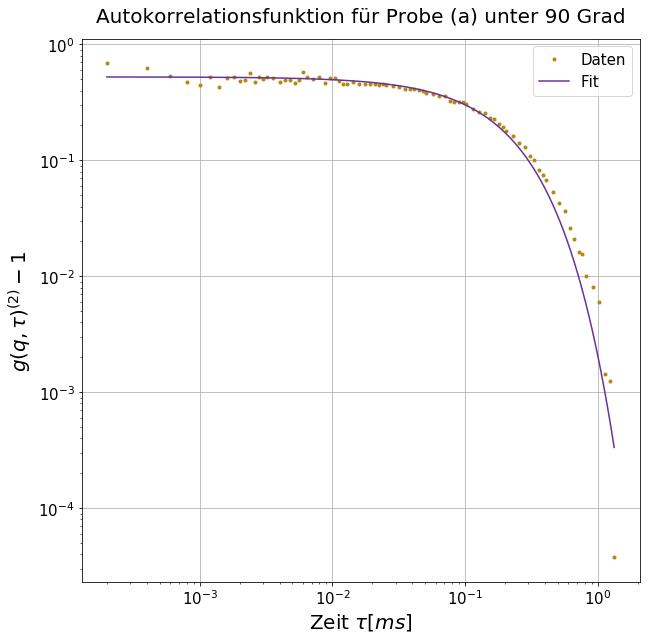

In [13]:
datei = 'proba90corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte9 = 12.49933 * np.sin(Degree_to_Radian(90)) * 1000
t = np.linspace(min(T), max(T), 10000)



q9 = q(na, Degree_to_Radian(90))
print(q9)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A8 = [1.58262986e+05, -3.16537026e+05, 5.24489570e-01]
i, _ = chisquare(f_obs = corr, f_exp = G(A8, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', i)



a_h8, da_h8 = a_h(1.58262986e+02, 5.72812385, q9, visa)
print('a_h8=', a_h8, 'da_h8=', da_h8)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A8, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 90 Grad', fontsize = 20, y = 1.02)
fig

24065995.9483
Beta: [  2.03633037e+05  -4.07279040e+05   5.02012967e-01]
Beta Std Error: [  5.10418305e+03   1.02088765e+04   5.76983595e-03]
Beta Covariance: [[  2.53658383e+11  -5.07342133e+11   1.14799799e+05]
 [ -5.07342133e+11   1.01473500e+12  -2.29619061e+05]
 [  1.14799799e+05  -2.29619061e+05   3.24133313e-01]]
Residual Variance: 0.00010270776101963531
Inverse Condition #: 1.194871621276434e-05
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 0.622224069723
a_h9= 6.94986658039e-10 da_h9= 1.74779522019e-11


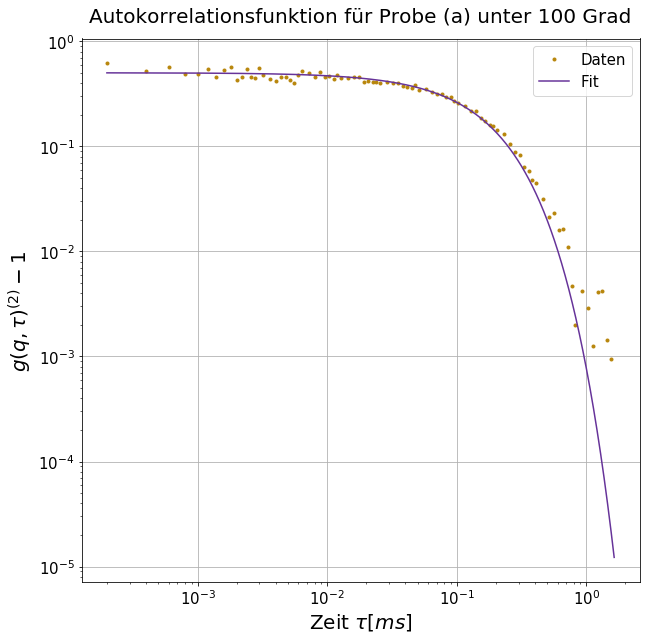

In [14]:
datei = 'proba100corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte10 = 11.79978 * np.sin(Degree_to_Radian(100)) * 1000
t = np.linspace(min(T), max(T), 10000)



q10 = q(na, Degree_to_Radian(100))
print(q10)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A9 = [2.03452408e+05, -4.06917783e+05, 5.02014328e-01]
j, _ = chisquare(f_obs = corr, f_exp = G(A9, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', j)



a_h9, da_h9 = a_h(2.03452408e+02,  5.11654637, q10, visa)
print('a_h9=', a_h9, 'da_h9=', da_h9)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A9, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 100 Grad', fontsize = 20, y = 1.02)
fig

25734420.4451
Beta: [  1.57855200e+05  -3.15724342e+05   5.01257517e-01]
Beta Std Error: [  3.60946861e+03   7.21920668e+03   2.80384963e-03]
Beta Covariance: [[  6.24497271e+11  -1.24904116e+12   2.02308416e+05]
 [ -1.24904116e+12   2.49817557e+12  -4.04641430e+05]
 [  2.02308416e+05  -4.04641430e+05   3.76836918e-01]]
Residual Variance: 2.0862002518717112e-05
Inverse Condition #: 8.41793839091255e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0449784672892
a_h10= 1.02360659596e-09 da_h10= 2.33392588834e-11


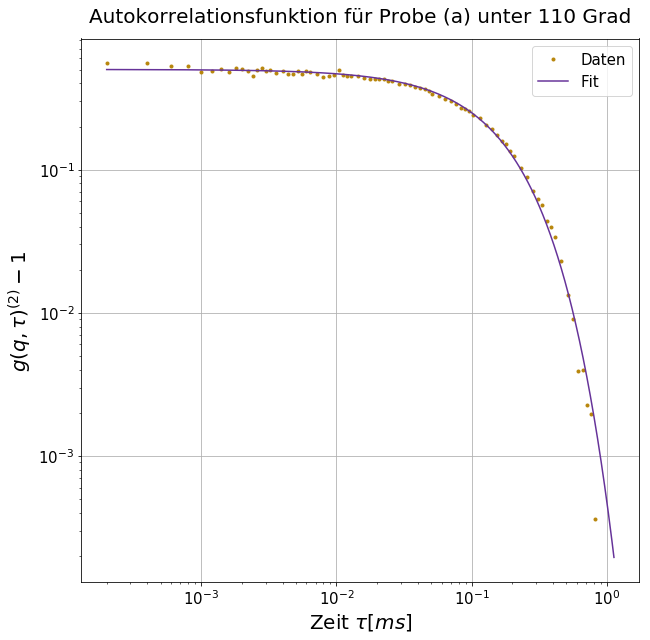

In [15]:
datei = 'proba110corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte11 = 21.40600 * np.sin(Degree_to_Radian(110)) * 1000
t = np.linspace(min(T), max(T), 10000)



q11 = q(na, Degree_to_Radian(110))
print(q11)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A10 = [1.57952801e+05, -3.15919543e+05, 5.01245244e-01]
k, _ = chisquare(f_obs = corr, f_exp = G(A10, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', k)



a_h10, da_h10 = a_h(1.57952801e+02,  3.60148257, q11, visa)
print('a_h10=', a_h10, 'da_h10=', da_h10)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A10, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 110 Grad', fontsize = 20, y = 1.02)
fig

27206990.4635
Beta: [  1.74393130e+05  -3.48801806e+05   4.61070763e-01]
Beta Std Error: [  4.23516609e+03   8.47064977e+03   2.76863811e-03]
Beta Covariance: [[  9.54191538e+11  -1.90845463e+12   2.64562278e+05]
 [ -1.90845463e+12   3.81705236e+12  -5.29156647e+05]
 [  2.64562278e+05  -5.29156647e+05   4.07781062e-01]]
Residual Variance: 1.879772680328753e-05
Inverse Condition #: 8.345427838238504e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 2.72106905933
a_h11= 1.03764066045e-09 da_h11= 2.14576742598e-11


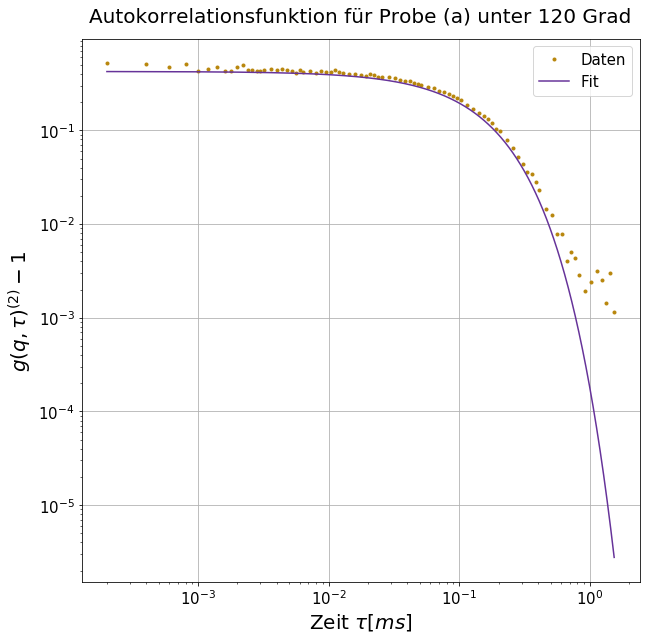

In [16]:
datei = 'proba120corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte12 = 25.28330 * np.sin(Degree_to_Radian(120)) * 1000
t = np.linspace(min(T), max(T), 10000)



q12 = q(na, Degree_to_Radian(120))
print(q12)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A11 = [1.74158891e+05, -3.48333329e+05, 4.24667812e-01]
l, _ = chisquare(f_obs = corr, f_exp = G(A11, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', l)



a_h11, da_h11 = a_h(1.74158891e+02,  3.60148257, q12, visa)
print('a_h11=', a_h11, 'da_h11=', da_h11)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A11, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 120 Grad', fontsize = 20, y = 1.02)
fig

28472498.8565
Beta: [  1.75900934e+05  -3.51818454e+05   4.70784753e-01]
Beta Std Error: [  2.99588036e+03   5.99197942e+03   1.85674251e-03]
Beta Covariance: [[  1.27309535e+12  -2.54628365e+12   3.44569698e+05]
 [ -2.54628365e+12   5.09275317e+12  -6.89179194e+05]
 [  3.44569698e+05  -6.89179194e+05   4.89007323e-01]]
Residual Variance: 7.049981843255477e-06
Inverse Condition #: 7.841624996747607e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0492389979077
a_h12= 1.12918190754e-09 da_h12= 1.9374971876e-11


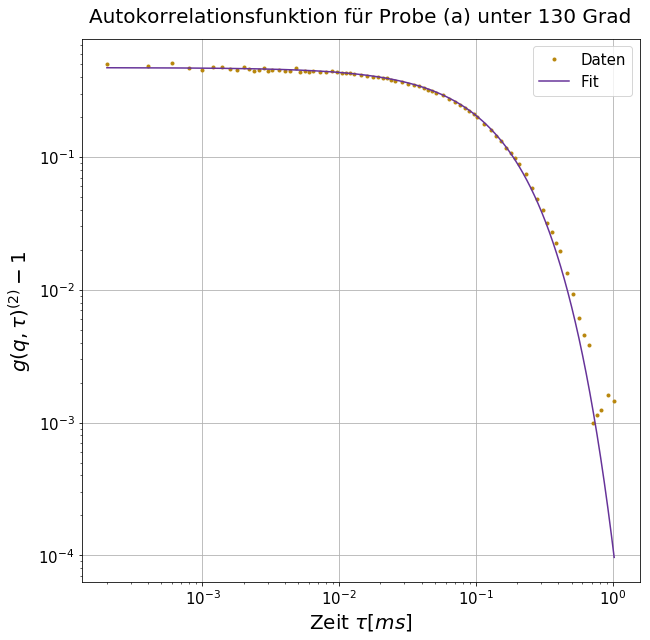

In [17]:
datei = 'proba130corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte13 = 51.30335 * np.sin(Degree_to_Radian(130)) * 1000
t = np.linspace(min(T), max(T), 10000)



q13 = q(na, Degree_to_Radian(130))
print(q13)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A12 = [1.75274558e+05, -3.50565702e+05, 4.70786402e-01]
m, _ = chisquare(f_obs = corr, f_exp = G(A12, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', m)



a_h12, da_h12 = a_h(1.75274558e+02,  3.00743362, q13, visa)
print('a_h12=', a_h12, 'da_h12=', da_h12)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A12, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 130 Grad', fontsize = 20, y = 1.02)
fig

29521314.3409
Beta: [  1.73696768e+05  -3.47411251e+05   4.43002637e-01]
Beta Std Error: [  2.82673478e+03   5.65366056e+03   1.43773471e-03]
Beta Covariance: [[  1.92702253e+12  -3.85417527e+12   4.25700955e+05]
 [ -3.85417527e+12   7.70861099e+12  -8.51447543e+05]
 [  4.25700955e+05  -8.51447543e+05   4.98510358e-01]]
Residual Variance: 4.146515864615813e-06
Inverse Condition #: 7.236790741978353e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.15298000008
a_h13= 1.22490170134e-09 da_h13= 1.99226966127e-11


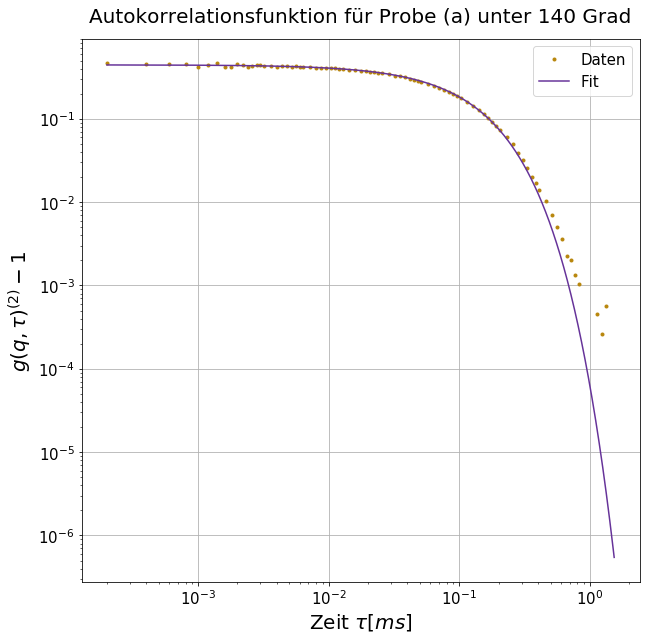

In [18]:
datei = 'proba140corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte14 = 76.88468 * np.sin(Degree_to_Radian(140)) * 1000
t = np.linspace(min(T), max(T), 10000)



q14 = q(na, Degree_to_Radian(140))
print(q14)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A13 = [1.73700778e+05, -3.47419273e+05, 4.43002359e-01]
n, _ = chisquare(f_obs = corr, f_exp = G(A13, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', n)



a_h13, da_h13 = a_h(1.73700778e+02,  2.82519642 , q14, visa)
print('a_h13=', a_h13, 'da_h13=', da_h13)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A13, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 140 Grad', fontsize = 20, y = 1.02)
fig

30345454.7978
Beta: [  2.04237425e+05  -4.08493647e+05   3.82827251e-01]
Beta Std Error: [  2.68646070e+03   5.37311902e+03   1.18649066e-03]
Beta Covariance: [[  2.25495579e+12  -4.51007745e+12   4.39280323e+05]
 [ -4.51007745e+12   9.02048666e+12  -8.78611699e+05]
 [  4.39280323e+05  -8.78611699e+05   4.39851111e-01]]
Residual Variance: 3.200537742200769e-06
Inverse Condition #: 7.872704949393751e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.207258187799
a_h14= 1.10525161629e-09 da_h14= 1.46329322947e-11


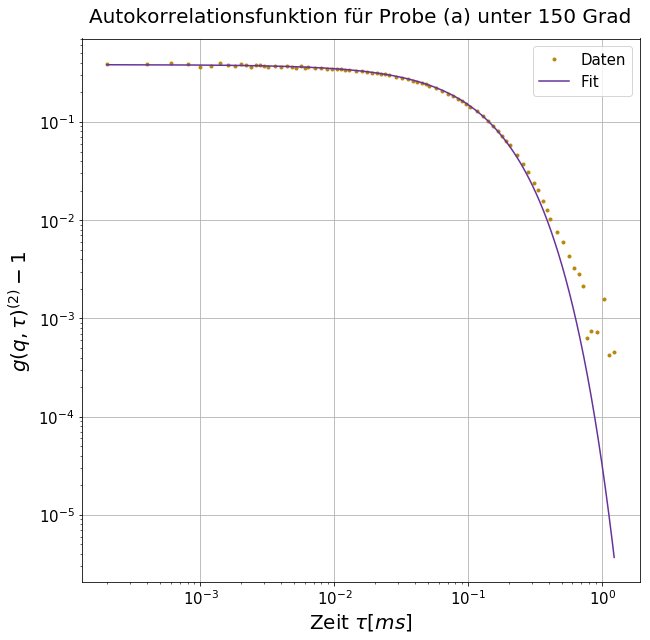

In [19]:
datei = 'proba150corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte15 = 108.22923 * np.sin(Degree_to_Radian(150)) * 1000
t = np.linspace(min(T), max(T), 10000)



q15 = q(na, Degree_to_Radian(150))
print(q15)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A14 = [2.03403193e+05, -4.06825183e+05, 3.82830016e-01]
o, _ = chisquare(f_obs = corr, f_exp = G(A14, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', o)



a_h14, da_h14 = a_h(2.03403193e+02,  2.69294802 , q15, visa)
print('a_h14=', a_h14, 'da_h14=', da_h14)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A14, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (a) unter 150 Grad', fontsize = 20, y = 1.02)
fig

Durschnittlicher hydrodynamischer Radius= 9.42677974905e-10 Fehler= 1.2267093099e-10


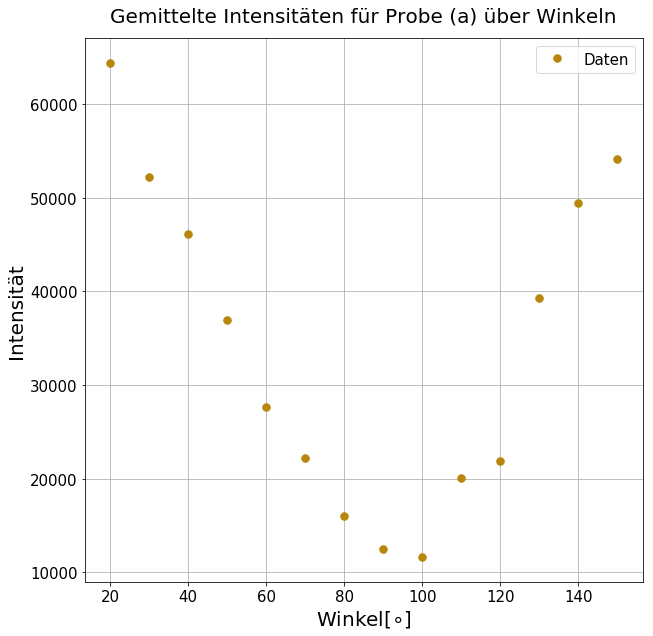

In [20]:
A_H_array = np.array([a_h1, a_h2, a_h3, a_h4, a_h5, a_h6, a_h7, a_h8, a_h9, a_h10, a_h11, a_h12, a_h13, a_h14])
A_H = np.mean(A_H_array)
dA_H_array = np.array([da_h1, da_h2, da_h3, da_h4, da_h5, da_h6, da_h7, da_h8, da_h9, da_h10, da_h11, da_h12, da_h13, da_h14])
dA_H = 0
for i in range(len(dA_H_array)):
    dA_H += dA_H_array[i]**2
dA_H = np.sqrt(dA_H)
print('Durschnittlicher hydrodynamischer Radius=', A_H, 'Fehler=', dA_H)



Inte = np.array([inte2, inte3, inte4, inte5, inte6, inte7, inte8, inte9, inte10, inte11, inte12, inte13, inte14, inte15])
Angle = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Angle, Inte, linestyle = 'none', marker = '.', color = 'darkgoldenrod', markersize = 15, label = 'Daten')
ax.set_xlabel(r'Winkel$[\circ]$', fontsize = 20)
ax.set_ylabel('Intensität', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Gemittelte Intensitäten für Probe (a) über Winkeln', fontsize = 20, y = 1.02)
fig

Beta: [  1.11895429e-09]
Beta Std Error: [  7.87787345e-12]
Beta Covariance: [[  3.81181990e-14]]
Residual Variance: 1.6281170571907808e-09
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


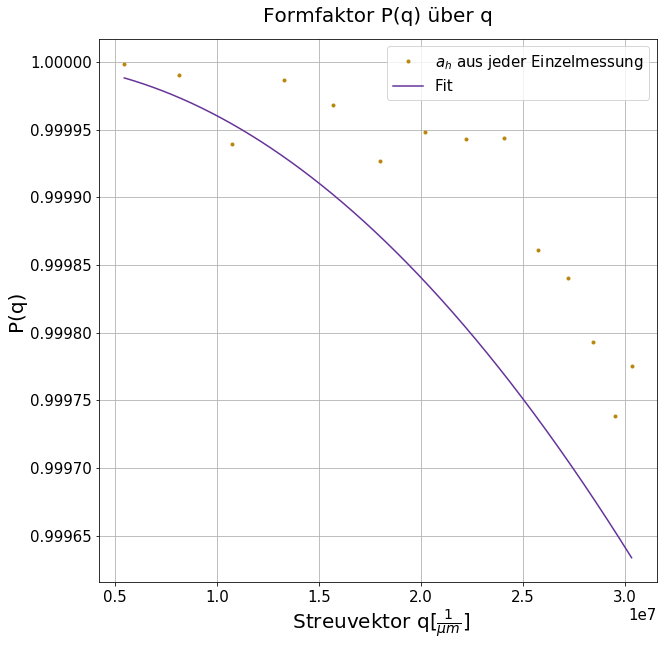

In [21]:
Q = np.array([q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, q14, q15])
Q_k = np.linspace(min(Q), max(Q), 100000)
dat = P(Q, A_H_array)
kont = P(Q_k, A_H)

D_A = scp.Boltzmann * 298.16000 / (6 * np.pi * visa * 9.42677974905e-10)
dD_A = 1.2267093099e-10 * scp.Boltzmann * 298.16000 / (6 * np.pi * visa * (9.42677974905e-10)**2)
DA = [D_A, dD_A]

data = RealData(Q, dat)
odr = ODR(data, p, beta0 = [9.42677974905e-09])
fit = odr.run()
fit.pprint()


fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Q, dat, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = r'$a_{h}$ aus jeder Einzelmessung')
ax.plot(Q_k, P(1.41055835e-09, Q_k), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r' Streuvektor q$[\frac{1}{\mu m}]$', fontsize = 20)
ax.set_ylabel('P(q)', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Formfaktor P(q) über q', fontsize = 20, y = 1.02)
fig

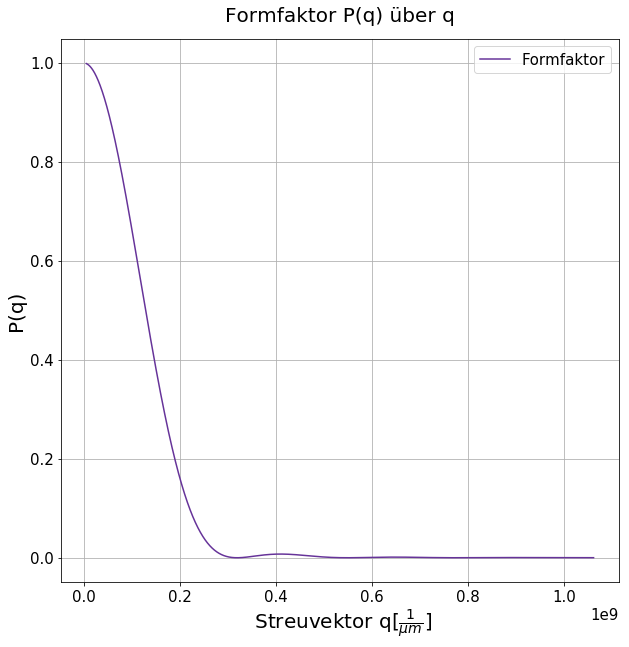

In [22]:
Q_k = np.linspace(min(Q), 35 * max(Q), 10000)
kont = P(1.40609098e-08, Q_k)
fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Q_k, kont, color = 'rebeccapurple', label = r'Formfaktor')
ax.set_xlabel(r' Streuvektor q$[\frac{1}{\mu m}]$', fontsize = 20)
ax.set_ylabel('P(q)', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Formfaktor P(q) über q', fontsize = 20, y = 1.02)
fig

5455318.39268
Beta: [  1.32874442e+04  -2.65752677e+04   5.92022362e-01]
Beta Std Error: [  4.61885672e+01   9.23840942e+01   1.41280075e-03]
Beta Covariance: [[  1.57629858e+07  -3.15283466e+07   1.33972655e+02]
 [ -3.15283466e+07   6.30614441e+07  -2.67982894e+02]
 [  1.33972655e+02  -2.67982894e+02   1.47479391e-02]]
Residual Variance: 0.0001353413481772194
Inverse Condition #: 2.5911213594840965e-05
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 6.0922058093
a_h1= 5.45968676577e-10 da_h1= 1.89147883416e-12


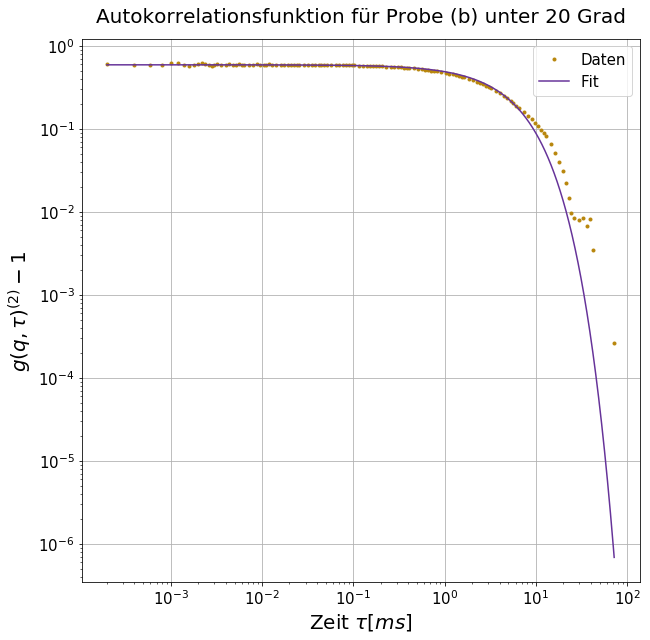

In [23]:
datei = 'probb20corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte2 = 325.87613 * np.sin(Degree_to_Radian(20)) * 1000
t = np.linspace(min(T), max(T), 10000)



q2 = q(na, Degree_to_Radian(20))
print(q2)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.2e4, -2.4e4, 0.56])
fit = odr.run()
fit.pprint()



A1 = [1.33077337e+04, -2.66158467e+04, 5.92025733e-01]
a, _ = chisquare(f_obs = corr, f_exp = G(A1, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', a)



a_h1, da_h1 = a_h(1.33077337e1, 4.61039208e-2, q2, visa)
print('a_h1=', a_h1, 'da_h1=', da_h1)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A1, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 20 Grad', fontsize = 20, y = 1.02)
fig

8131040.10703
Beta: [  2.07292410e+04  -4.14595404e+04   5.60944395e-01]
Beta Std Error: [  1.29078266e+02   2.58167715e+02   8.40196920e-04]
Beta Covariance: [[  4.49732216e+08  -8.99503396e+08   8.93119032e+02]
 [ -8.99503396e+08   1.79908473e+09  -1.78637905e+03]
 [  8.93119032e+02  -1.78637905e+03   1.90550427e-02]]
Residual Variance: 3.7046931705117074e-05
Inverse Condition #: 1.2655719806235856e-05
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 8.45970406192
a_h2= 7.78551990591e-10 da_h2= 4.8471519588e-12


C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


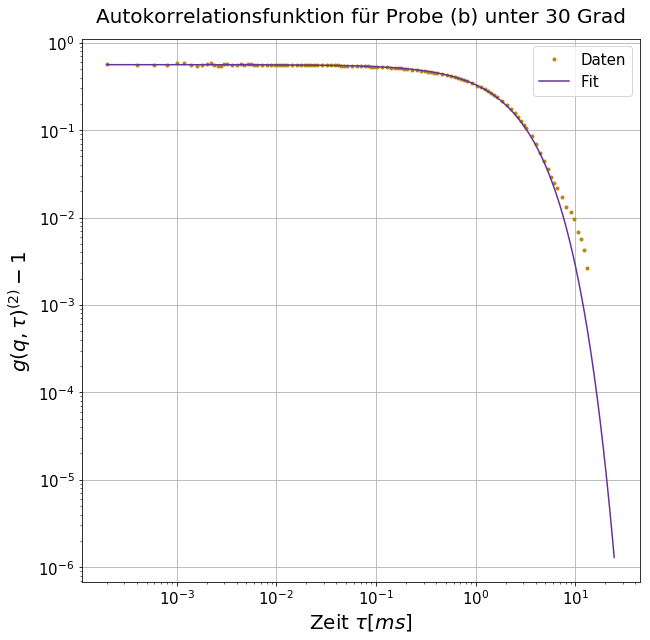

In [24]:
datei = 'probb30corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte3 = 188.48679 * np.sin(Degree_to_Radian(30)) * 1000
t = np.linspace(min(T), max(T), 10000)



q3 = q(na, Degree_to_Radian(30))
print(q3)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.4e4, -3.3e4, 0.6])
fit = odr.run()
fit.pprint()



A2 = [2.07317618e+04, -4.14645821e+04, 5.60944401e-01]
b, _ = chisquare(f_obs = corr, f_exp = G(A2, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', b)



a_h2, da_h2 = a_h(2.07317618e1, 1.29072947e-1, q3, visa)
print('a_h2=', a_h2, 'da_h2=', da_h2)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A2, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 30 Grad', fontsize = 20, y = 1.02)
fig

10744879.6965
Beta: [  2.13781777e+04  -4.27581955e+04   5.51265951e-01]
Beta Std Error: [  3.32548506e+02   6.65114598e+02   8.09539082e-04]
Beta Covariance: [[  4.12634975e+09  -8.25291772e+09   3.22916415e+03]
 [ -8.25291772e+09   1.65062719e+10  -6.45863678e+03]
 [  3.22916415e+03  -6.45863678e+03   2.44529734e-02]]
Residual Variance: 2.6800565952304465e-05
Inverse Condition #: 7.896780252843953e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.29042950542
a_h3= 1.3177572087e-09 da_h3= 2.05076314389e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


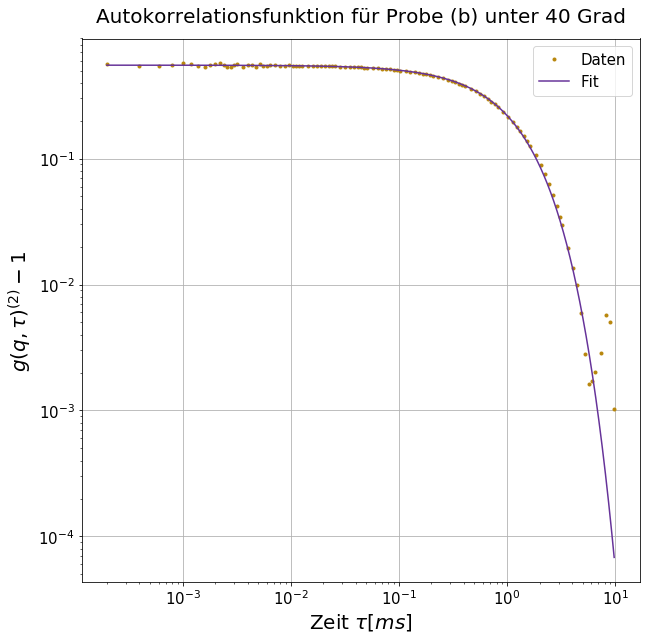

In [25]:
datei = 'probb40corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte4 = 127.29617 * np.sin(Degree_to_Radian(40)) * 1000
t = np.linspace(min(T), max(T), 10000)



q4 = q(na, Degree_to_Radian(40))
print(q4)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [1.6e4, -3.3e4, 0.6])
fit = odr.run()
fit.pprint()



A3 = [2.13894362e+04, -4.27807125e+04, 5.51265014e-01]
c, _ = chisquare(f_obs = corr, f_exp = G(A3, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', c)



a_h3, da_h3 = a_h(2.13894362e1, 3.32873667e-1, q4, visa)
print('a_h3=', a_h3, 'da_h3=', da_h3)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A3, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 40 Grad', fontsize = 20, y = 1.02)
fig

13276944.2636
Beta: [  3.68903850e+04  -7.37835814e+04   5.51771259e-01]
Beta Std Error: [  4.59103641e+02   9.18235695e+02   9.38638617e-04]
Beta Covariance: [[  8.05986361e+09  -1.61202260e+10   5.54626350e+03]
 [ -1.61202260e+10   3.22414498e+10  -1.10931396e+04]
 [  5.54626350e+03  -1.10931396e+04   3.36901585e-02]]
Residual Variance: 2.6151329989370858e-05
Inverse Condition #: 9.136831145786137e-06
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 13.1474226737
a_h4= 7.64135008438e-10 da_h4= 9.51680117743e-12


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


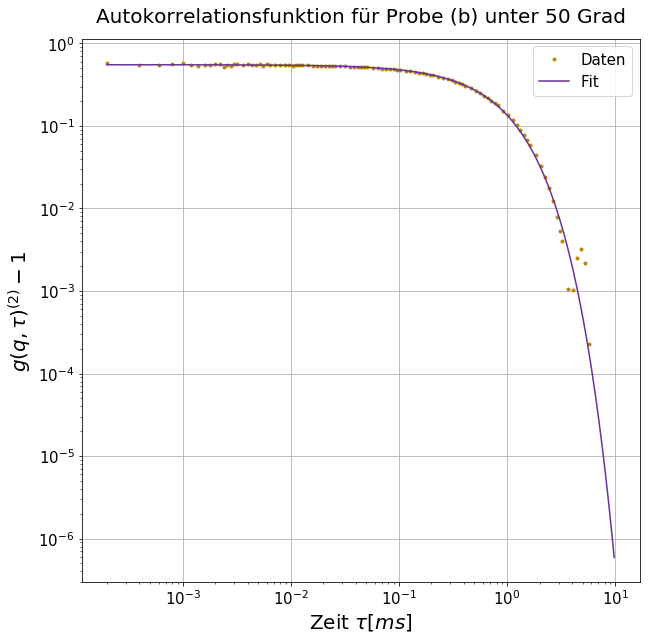

In [26]:
datei = 'probb50corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte5 = 86.41484 * np.sin(Degree_to_Radian(50)) * 1000
t = np.linspace(min(T), max(T), 10000)



q5 = q(na, Degree_to_Radian(50))
print(q5)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [3e4, -6e4, 0.6])
fit = odr.run()
fit.pprint()



A4 = [3.68862615e+04, -7.37753344e+04, 5.51767227e-01]
d, _ = chisquare(f_obs = corr, f_exp = G(A4, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', d)



a_h4, da_h4 = a_h(3.68862615e1, 4.59394234e-1, q4, visa)
print('a_h4=', a_h4, 'da_h4=', da_h4)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A4, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 50 Grad', fontsize = 20, y = 1.02)
fig

15707963.2679
Beta: [  7.04939051e+04  -1.40991617e+05   5.47033255e-01]
Beta Std Error: [  6.82017389e+02   1.36409700e+03   1.63028608e-03]
Beta Covariance: [[  8.12736945e+09  -1.62554804e+10   6.84224288e+03]
 [ -1.62554804e+10   3.25124439e+10  -1.36855800e+04]
 [  6.84224288e+03  -1.36855800e+04   4.64394157e-02]]
Residual Variance: 5.7232259760153746e-05
Inverse Condition #: 1.3147089840583808e-05
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 7.49118233092
a_h5= 9.05262816392e-10 da_h5= 9.84108816334e-12


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


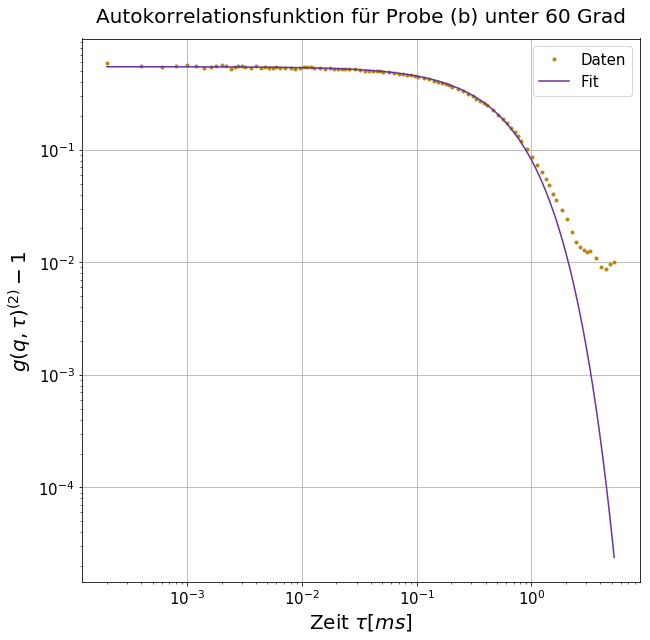

In [27]:
datei = 'probb60corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte6 = 56.27223 * np.sin(Degree_to_Radian(60)) * 1000
t = np.linspace(min(T), max(T), 10000)



q6 = q(na, Degree_to_Radian(60))
print(q6)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()

A5 = [6.65421295e+04, -1.33088066e+05, 5.47021281e-01]
e, _ = chisquare(f_obs = corr, f_exp = G(A5, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', e)



a_h5, da_h5 = a_h(6.65421295e1, 7.23377732e-1, q6, visa)
print('a_h5=', a_h5, 'da_h5=', da_h5)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A5, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 60 Grad', fontsize = 20, y = 1.02)
fig

18019435.1871
Beta: [  6.50969674e+04  -1.30199262e+05   5.33400465e-01]
Beta Std Error: [  1.34984645e+03   2.69977843e+03   1.75097624e-03]
Beta Covariance: [[  4.19109665e+10  -8.38245886e+10   1.94197917e+04]
 [ -8.38245886e+10   1.67654489e+11  -3.88417390e+04]
 [  1.94197917e+04  -3.88417390e+04   7.05211600e-02]]
Residual Variance: 4.347514704163855e-05
Inverse Condition #: 8.676395349384354e-06
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 757.506889677
a_h6= 1.21787914467e-09 da_h6= 2.52619291675e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


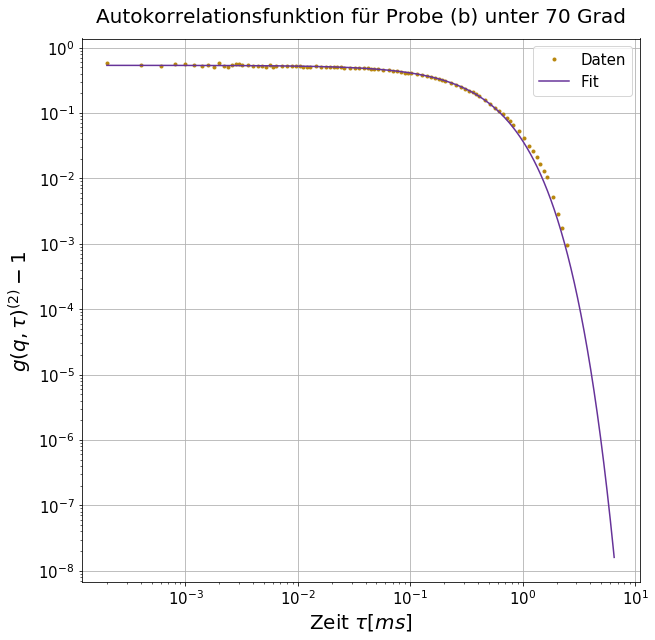

In [28]:
datei = 'probb70corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte7 = 40.99685 * np.sin(Degree_to_Radian(70)) * 1000
t = np.linspace(min(T), max(T), 10000)



q7 = q(na, Degree_to_Radian(70))
print(q7)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A6 = [6.50893265e+04, -1.30183981e+05 , 5.33418797e-01]
f, _ = chisquare(f_obs = corr, f_exp = G(A6, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', f)



a_h6, da_h6 = a_h(6.50893265e1, 1.35011915, q7, visa)
print('a_h6=', a_h6, 'da_h6=', da_h6)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A6, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 70 Grad', fontsize = 20, y = 1.02)
fig

20193768.3241
Beta: [  8.82924692e+04  -1.76591877e+05   5.28435318e-01]
Beta Std Error: [  2.00976039e+03   4.01966190e+03   2.41255091e-03]
Beta Covariance: [[  7.49540973e+10  -1.49913458e+11   3.40395593e+04]
 [ -1.49913458e+11   2.99837444e+11  -6.80832025e+04]
 [  3.40395593e+04  -6.80832025e+04   1.08008961e-01]]
Residual Variance: 5.388813886530156e-05
Inverse Condition #: 9.094681395907466e-06
Reason(s) for Halting:
  Parameter convergence
Chi^2_DDOF= 0.219151039715
a_h7= 1.13663065152e-09 da_h7= 2.62823883562e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


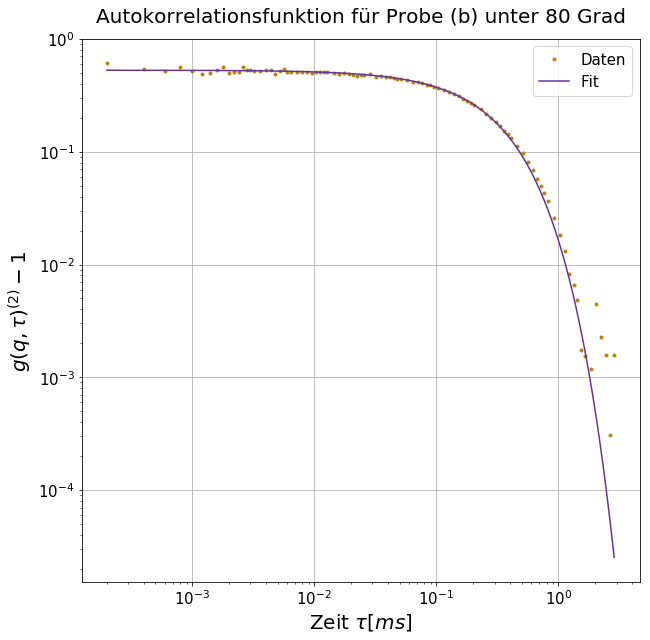

In [29]:
datei = 'probb80corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte8 = 27.71599 * np.sin(Degree_to_Radian(80)) * 1000
t = np.linspace(min(T), max(T), 10000)



q8 = q(na, Degree_to_Radian(80))
print(q8)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A7 = [8.75884818e+04, -1.75183902e+05, 5.28414751e-01]
h, _ = chisquare(f_obs = corr, f_exp = G(A7, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', h)



a_h7, da_h7 = a_h(8.75884818e1,  2.02531446, q8, visa)
print('a_h7=', a_h7, 'da_h7=', da_h7)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A7, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 80 Grad', fontsize = 20, y = 1.02)
fig

22214414.6908
Beta: [  8.51328402e+04  -1.70273956e+05   5.01587222e-01]
Beta Std Error: [  3.02445722e+03   6.04909259e+03   2.53634243e-03]
Beta Covariance: [[  1.94774824e+11  -3.89561122e+11   6.40202072e+04]
 [ -3.89561122e+11   7.79145190e+11  -1.28046741e+05]
 [  6.40202072e+04  -1.28046741e+05   1.36978909e-01]]
Residual Variance: 4.6963674573867744e-05
Inverse Condition #: 7.3383147905404335e-06
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 1.5517032525
a_h8= 1.41412211783e-09 da_h8= 5.01067333628e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


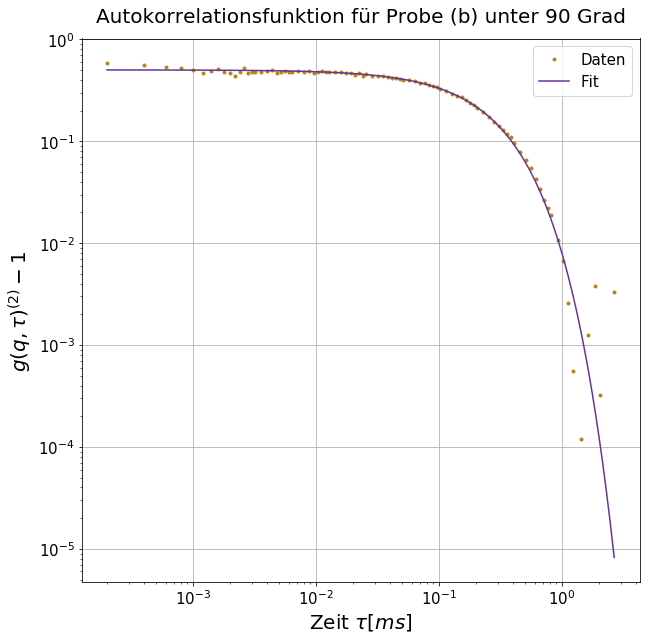

In [30]:
datei = 'probb90corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte9 = 21.10417 * np.sin(Degree_to_Radian(90)) * 1000
t = np.linspace(min(T), max(T), 10000)



q9 = q(na, Degree_to_Radian(90))
print(q9)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A8 = [8.51950688e+04, -1.70398413e+05, 5.01587926e-01]
i, _ = chisquare(f_obs = corr, f_exp = G(A8, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', i)



a_h8, da_h8 = a_h(8.51950688e1, 3.01872557, q9, visa)
print('a_h8=', a_h8, 'da_h8=', da_h8)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A8, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 90 Grad', fontsize = 20, y = 1.02)
fig

24065995.9483
Beta: [  1.15680198e+05  -2.31370654e+05   5.36688182e-01]
Beta Std Error: [  4.19231461e+03   8.38491831e+03   4.01455555e-03]
Beta Covariance: [[  2.49598308e+11  -4.99213828e+11   9.54162756e+04]
 [ -4.99213828e+11   9.98462081e+11  -1.90843578e+05]
 [  9.54162756e+04  -1.90843578e+05   2.28880528e-01]]
Residual Variance: 7.041514793609116e-05
Inverse Condition #: 8.306554778162521e-06
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 0.297499034824
a_h9= 1.21923715338e-09 da_h9= 4.40217904697e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


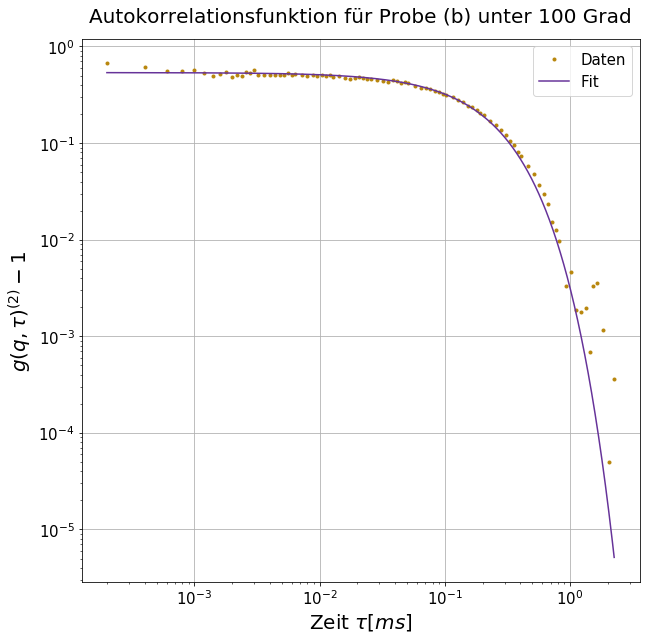

In [31]:
datei = 'probb100corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte10 = 19.11214 * np.sin(Degree_to_Radian(100)) * 1000
t = np.linspace(min(T), max(T), 10000)



q10 = q(na, Degree_to_Radian(100))
print(q10)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A9 = [1.15971457e+05, -2.31953173e+05, 5.36690976e-01]
j, _ = chisquare(f_obs = corr, f_exp = G(A9, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', j)



a_h9, da_h9 = a_h(1.15971457e+02,  4.18726674, q10, visa)
print('a_h9=', a_h9, 'da_h9=', da_h9)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A9, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 100 Grad', fontsize = 20, y = 1.02)
fig

25734420.4451
Beta: [  1.21173944e+05  -2.42358922e+05   4.93241610e-01]
Beta Std Error: [  2.99003362e+03   5.98026939e+03   2.36827046e-03]
Beta Covariance: [[  3.65205207e+11  -7.30435104e+11   1.17444173e+05]
 [ -7.30435104e+11   1.46091959e+12  -2.34901449e+05]
 [  1.17444173e+05  -2.34901449e+05   2.29111777e-01]]
Residual Variance: 2.4480212441295434e-05
Inverse Condition #: 7.988253427741094e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 921.368961938
a_h10= 1.32880747187e-09 da_h10= 3.24797137364e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


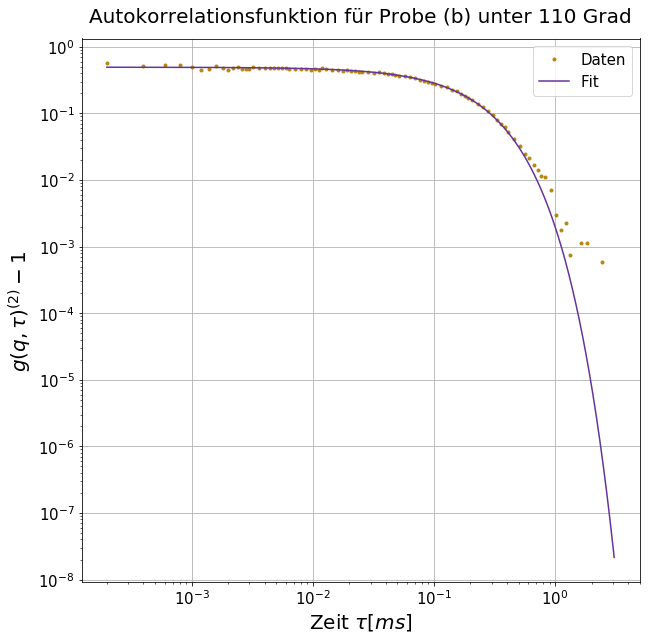

In [32]:
datei = 'probb110corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte11 = 35.38588 * np.sin(Degree_to_Radian(110)) * 1000
t = np.linspace(min(T), max(T), 10000)



q11 = q(na, Degree_to_Radian(110))
print(q11)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A10 = [1.21674157e+05, -2.43359347e+05, 4.93237703e-01]
k, _ = chisquare(f_obs = corr, f_exp = G(A10, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', k)



a_h10, da_h10 = a_h(1.21674157e+02,  2.97405145, q11, visa)
print('a_h10=', a_h10, 'da_h10=', da_h10)




fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A10, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 110 Grad', fontsize = 20, y = 1.02)
fig

27206990.4635
Beta: [  1.33372114e+05  -2.66756539e+05   4.79589116e-01]
Beta Std Error: [  2.55786918e+03   5.11591407e+03   1.83615448e-03]
Beta Covariance: [[  5.30451570e+11  -1.06093958e+12   1.59330967e+05]
 [ -1.06093958e+12   2.12195205e+12  -3.18679652e+05]
 [  1.59330967e+05  -3.18679652e+05   2.73342723e-01]]
Residual Variance: 1.23341980442565e-05
Inverse Condition #: 7.853124151863068e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0812874938623
a_h11= 1.35671191063e-09 da_h11= 2.60409301897e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


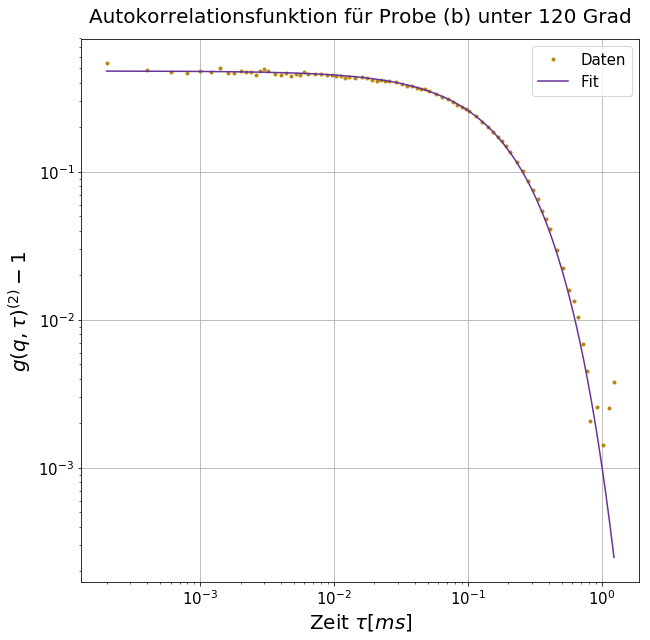

In [33]:
datei = 'probb120corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte12 = 41.90789 * np.sin(Degree_to_Radian(120)) * 1000
t = np.linspace(min(T), max(T), 10000)



q12 = q(na, Degree_to_Radian(120))
print(q12)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A11 = [1.33200236e+05, -2.66412784e+05, 4.79585942e-01]
l, _ = chisquare(f_obs = corr, f_exp = G(A11, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', l)



a_h11, da_h11 = a_h(1.33200236e+02,  2.55666514, q12, visa)
print('a_h11=', a_h11, 'da_h11=', da_h11)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A11, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 120 Grad', fontsize = 20, y = 1.02)
fig

28472498.8565
Beta: [  1.31844269e+05  -2.63701786e+05   4.66102400e-01]
Beta Std Error: [  1.82502477e+03   3.65016604e+03   1.11921903e-03]
Beta Covariance: [[  7.92345312e+11  -1.58474120e+12   2.02440366e+05]
 [ -1.58474120e+12   3.16958356e+12  -4.04901664e+05]
 [  2.02440366e+05  -4.04901664e+05   2.97993739e-01]]
Residual Variance: 4.2036159856508006e-06
Inverse Condition #: 7.242170720056693e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0593071620373
a_h12= 1.49772470611e-09 da_h12= 2.06154800675e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


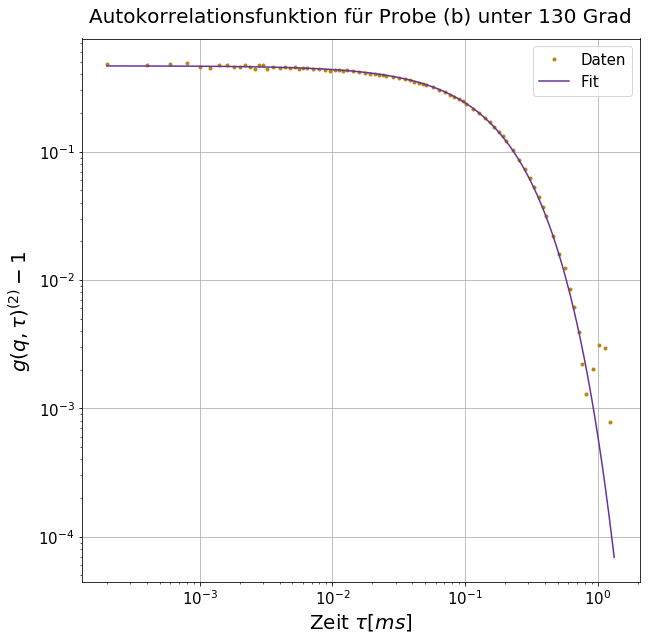

In [34]:
datei = 'probb130corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte13 = 83.88427 * np.sin(Degree_to_Radian(130)) * 1000
t = np.linspace(min(T), max(T), 10000)



q13 = q(na, Degree_to_Radian(130))
print(q13)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A12 = [1.32145019e+05, -2.64303286e+05, 4.66099894e-01]
m, _ = chisquare(f_obs = corr, f_exp = G(A12, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', m)



a_h12, da_h12 = a_h(1.32145019e+02,  1.81891438 , q13, visa)
print('a_h12=', a_h12, 'da_h12=', da_h12)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A12, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 130 Grad', fontsize = 20, y = 1.02)
fig

29521314.3409
Beta: [  1.41634432e+05  -2.83283269e+05   4.33007925e-01]
Beta Std Error: [  1.62816215e+03   3.25642790e+03   8.56112371e-04]
Beta Covariance: [[  1.13380391e+12  -2.26767996e+12   2.53705514e+05]
 [ -2.26767996e+12   4.53550421e+12  -5.07436918e+05]
 [  2.53705514e+05  -5.07436918e+05   3.13475920e-01]]
Residual Variance: 2.3380691937817297e-06
Inverse Condition #: 7.110204909945861e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0492834936622
a_h13= 1.50121925249e-09 da_h13= 1.72388265855e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


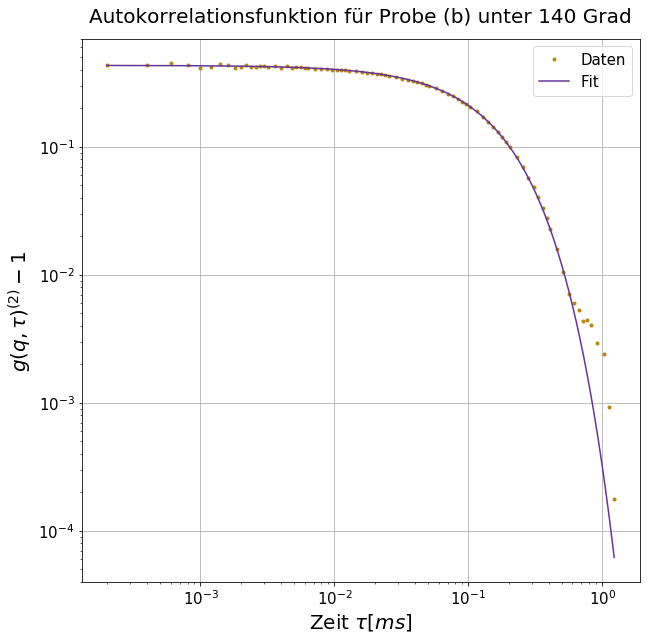

In [35]:
datei = 'probb140corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte14 = 124.16869 * np.sin(Degree_to_Radian(140)) * 1000
t = np.linspace(min(T), max(T), 10000)



q14 = q(na, Degree_to_Radian(140))
print(q14)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A13 = [1.41729050e+05, -2.83472504e+05, 4.33007556e-01]
n, _ = chisquare(f_obs = corr, f_exp = G(A13, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', n)



a_h13, da_h13 = a_h(1.41729050e+02,  1.62750545, q14, visa)
print('a_h13=', a_h13, 'da_h13=', da_h13)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A13, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 140 Grad', fontsize = 20, y = 1.02)
fig

30345454.7978
Beta: [  1.48941668e+05  -2.97898718e+05   3.79903216e-01]
Beta Std Error: [  2.11805761e+03   4.23624614e+03   8.80611493e-04]
Beta Covariance: [[  1.65909684e+12  -3.31829622e+12   2.95687427e+05]
 [ -3.31829622e+12   6.63679754e+12  -5.91404226e+05]
 [  2.95687427e+05  -5.91404226e+05   2.86790589e-01]]
Residual Variance: 2.703982041513467e-06
Inverse Condition #: 6.952053885309838e-06
Reason(s) for Halting:
  Sum of squares convergence
Chi^2_DDOF= 0.0302791309676
a_h14= 1.50776266743e-09 da_h14= 2.14222688786e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


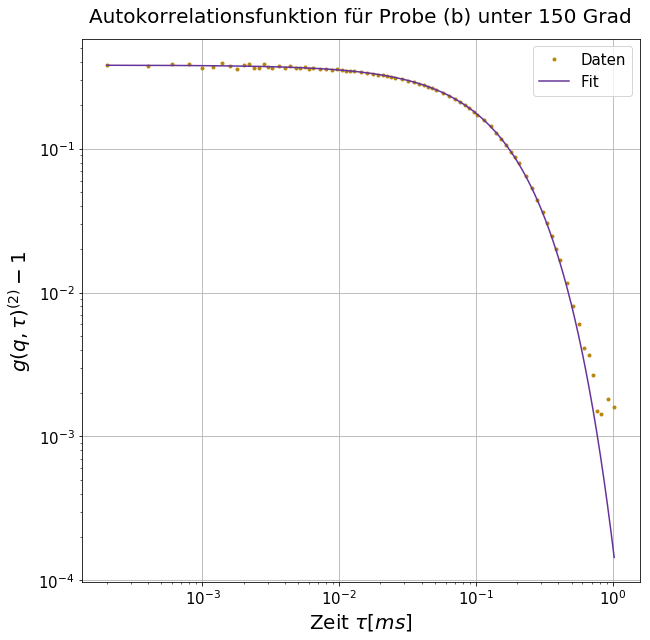

In [36]:
datei = 'probb150corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
inte15 = 174.98817 * np.sin(Degree_to_Radian(150)) * 1000
t = np.linspace(min(T), max(T), 10000)



q15 = q(na, Degree_to_Radian(150))
print(q15)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A14 = [1.49102848e+05, -2.98221077e+05, 3.79901342e-01]
o, _ = chisquare(f_obs = corr, f_exp = G(A14, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', o)



a_h14, da_h14 = a_h(1.49102848e+02,  2.11845098, q15, visa)
print('a_h14=', a_h14, 'da_h14=', da_h14)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A14, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (b) unter 150 Grad', fontsize = 20, y = 1.02)
fig

Durschnittlicher hydrodynamischer Radius= 1.1779836269e-09 Fehler= 9.65750196673e-11


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


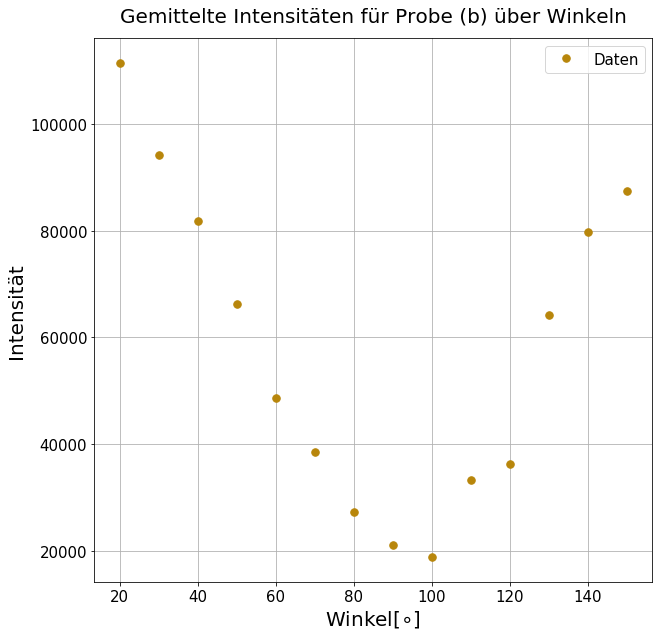

In [37]:
A_H_array = np.array([a_h1, a_h2, a_h3, a_h4, a_h5, a_h6, a_h7, a_h8, a_h9, a_h10, a_h11, a_h12, a_h13, a_h14])
A_H = np.mean(A_H_array)
dA_H_array = np.array([da_h1, da_h2, da_h3, da_h4, da_h5, da_h6, da_h7, da_h8, da_h9, da_h10, da_h11, da_h12, da_h13, da_h14])
dA_H = 0
for i in range(len(dA_H_array)):
    dA_H += dA_H_array[i]**2
dA_H = np.sqrt(dA_H)
print('Durschnittlicher hydrodynamischer Radius=', A_H, 'Fehler=', dA_H)



Inte = np.array([inte2, inte3, inte4, inte5, inte6, inte7, inte8, inte9, inte10, inte11, inte12, inte13, inte14, inte15])
Angle = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Angle, Inte, linestyle = 'none', marker = '.', color = 'darkgoldenrod', markersize = 15, label = 'Daten')
ax.set_xlabel(r'Winkel$[\circ]$', fontsize = 20)
ax.set_ylabel('Intensität', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Gemittelte Intensitäten für Probe (b) über Winkeln', fontsize = 20, y = 1.02)
fig

Beta: [  1.40769497e-09]
Beta Std Error: [  1.02030358e-11]
Beta Covariance: [[  6.19010362e-14]]
Residual Variance: 1.6817479177902945e-09
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


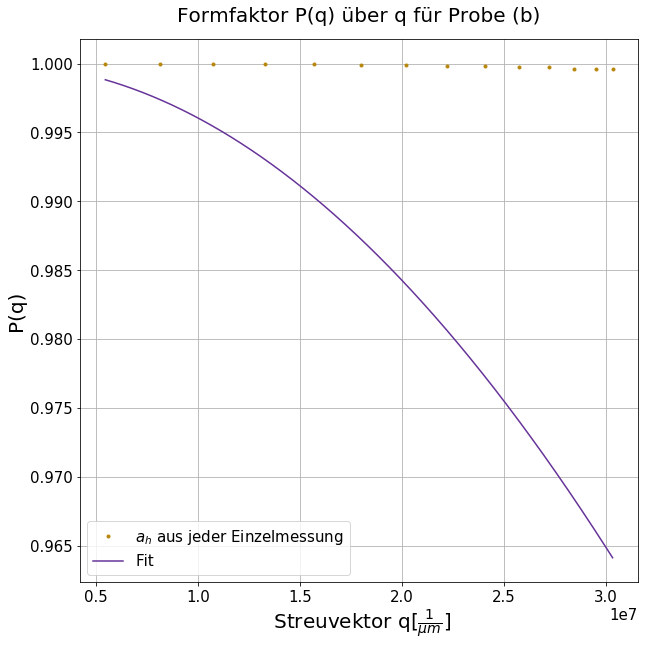

In [38]:
Q = np.array([q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, q14, q15])
Q_k = np.linspace(min(Q), max(Q), 100000)
dat = P(Q, A_H_array)
kont = P(Q_k, A_H)



data = RealData(Q, dat)
odr = ODR(data, p, beta0 = [1.1779836269e-08])
fit = odr.run()
fit.pprint()


fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Q, dat, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = r'$a_{h}$ aus jeder Einzelmessung')
ax.plot(Q_k, P(1.40608873e-08, Q_k), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r' Streuvektor q$[\frac{1}{\mu m}]$', fontsize = 20)
ax.set_ylabel('P(q)', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Formfaktor P(q) über q für Probe (b)', fontsize = 20, y = 1.02)
fig

C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


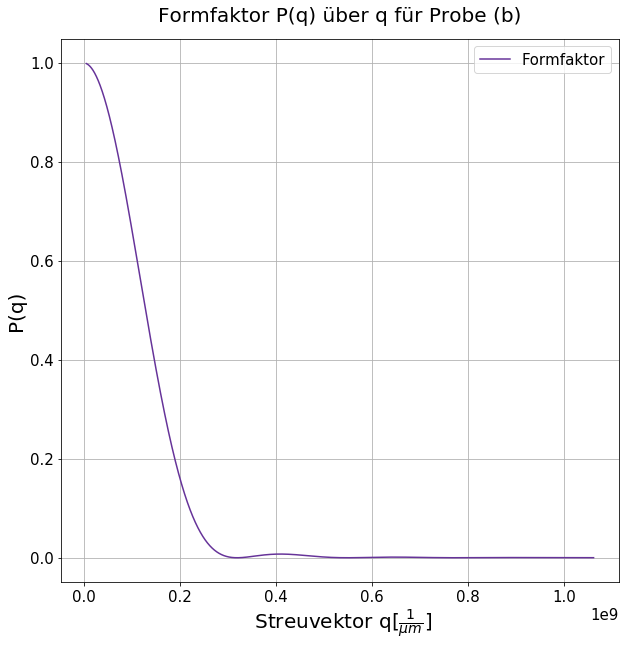

In [39]:
Q_k = np.linspace(min(Q), 35 * max(Q), 10000)
kont = P(1.40608873e-08, Q_k)
fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.plot(Q_k, kont, color = 'rebeccapurple', label = r'Formfaktor')
ax.set_xlabel(r' Streuvektor q$[\frac{1}{\mu m}]$', fontsize = 20)
ax.set_ylabel('P(q)', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Formfaktor P(q) über q für Probe (b)', fontsize = 20, y = 1.02)
fig

10744879.6965
Beta: [  5.31143523e+04  -1.06230283e+05   4.93195276e-01]
Beta Std Error: [  4.94716741e+02   9.89507767e+02   3.46582487e-03]
Beta Covariance: [[  4.40365454e+08  -8.80797030e+08   9.51699182e+02]
 [ -8.80797030e+08   1.76172632e+09  -1.90366033e+03]
 [  9.51699182e+02  -1.90366033e+03   2.16129105e-02]]
Residual Variance: 0.0005557762349903627
Inverse Condition #: 2.4600771768716424e-05
Reason(s) for Halting:
  Both sum of squares and parameter convergence
Chi^2_DDOF= 4363.60552449
a_h14= 5.30746110134e-10 da_h14= 4.94671610669e-12


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


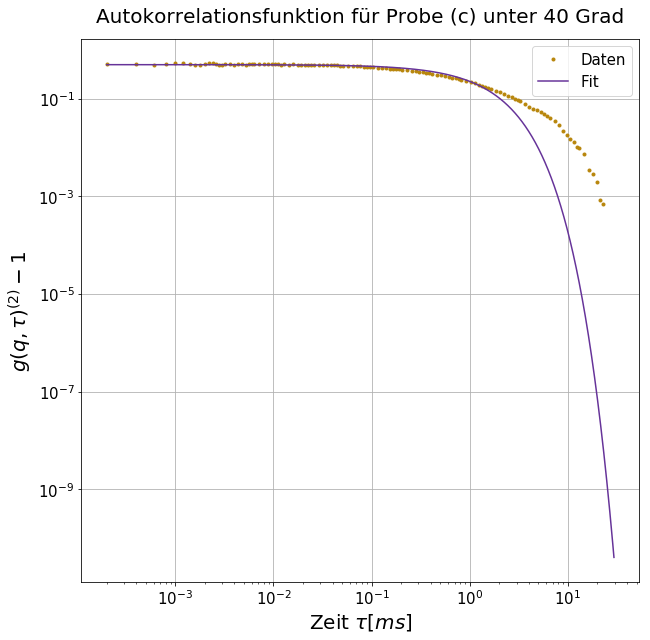

In [40]:
datei = 'probc40corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
t = np.linspace(min(T), max(T), 10000)



q15 = q(na, Degree_to_Radian(40))
print(q15)



data = RealData(T, corr)
odr = ODR(data, g, beta0 = [5e4, -1e5, 0.6])
fit = odr.run()
fit.pprint()



A14 = [5.31065291e+04, -1.06214636e+05, 4.93188797e-01]
o, _ = chisquare(f_obs = corr, f_exp = G(A14, T), ddof = (len(corr) - 3))
print('Chi^2_DDOF=', o)



a_h14, da_h14 = a_h(5.31065291e+01,  4.94969097e-1, q15, visa)
print('a_h14=', a_h14, 'da_h14=', da_h14)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.plot(t, G(A14, t), color = 'rebeccapurple', label = 'Fit')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (c) unter 40 Grad', fontsize = 20, y = 1.02)
fig

In [41]:
D_C = scp.Boltzmann * 298.16000 / (6 * np.pi * visa * 5.30746110134e-10)
dD_C = 1.2267093099e-10 * scp.Boltzmann * 298.16000 / (6 * np.pi * visa * (4.94671610669e-12)**2)
DC = [D_C, dD_C]
print(D_A, D_C)

2.5898121442916004e-13 4.599862007370718e-13


C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


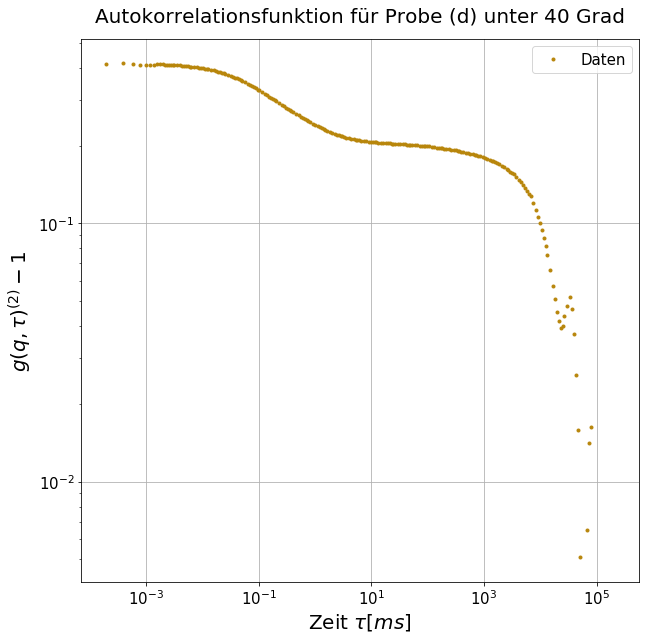

In [42]:
datei = 'probd40corr.txt'
T = np.loadtxt(datei, skiprows = 2, usecols = (0,))
corr = np.loadtxt(datei, skiprows = 2, usecols = (1,))
t = np.linspace(min(T), max(T), 10000)



fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(True)
matplotlib.rc('xtick', labelsize = 15) 
matplotlib.rc('ytick', labelsize = 15) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(T, corr, linestyle = 'none', marker = '.', color = 'darkgoldenrod', label = 'Daten')
ax.set_xlabel(r'Zeit $\tau[ms]$', fontsize = 20)
ax.set_ylabel(r'$g(q, \tau)^{(2)} - 1$', fontsize = 20)
ax.legend(loc = 'best', fontsize = 15)
ax.set_title('Autokorrelationsfunktion für Probe (d) unter 40 Grad', fontsize = 20, y = 1.02)
fig